In [1]:
# import the library used in the codes below
import numpy as np
import pandas as pd
import math
import os
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Set Seed
np.random.seed(2009)

In [3]:
datafile = pd.read_csv('sgemm_product.csv')
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
MWG          241600 non-null int64
NWG          241600 non-null int64
KWG          241600 non-null int64
MDIMC        241600 non-null int64
NDIMC        241600 non-null int64
MDIMA        241600 non-null int64
NDIMB        241600 non-null int64
KWI          241600 non-null int64
VWM          241600 non-null int64
VWN          241600 non-null int64
STRM         241600 non-null int64
STRN         241600 non-null int64
SA           241600 non-null int64
SB           241600 non-null int64
Run1 (ms)    241600 non-null float64
Run2 (ms)    241600 non-null float64
Run3 (ms)    241600 non-null float64
Run4 (ms)    241600 non-null float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [4]:
#checking for NA
datafile.isnull().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

In [5]:
datafile['avg_runtime']=datafile[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 19 columns):
MWG            241600 non-null int64
NWG            241600 non-null int64
KWG            241600 non-null int64
MDIMC          241600 non-null int64
NDIMC          241600 non-null int64
MDIMA          241600 non-null int64
NDIMB          241600 non-null int64
KWI            241600 non-null int64
VWM            241600 non-null int64
VWN            241600 non-null int64
STRM           241600 non-null int64
STRN           241600 non-null int64
SA             241600 non-null int64
SB             241600 non-null int64
Run1 (ms)      241600 non-null float64
Run2 (ms)      241600 non-null float64
Run3 (ms)      241600 non-null float64
Run4 (ms)      241600 non-null float64
avg_runtime    241600 non-null float64
dtypes: float64(5), int64(14)
memory usage: 35.0 MB


In [6]:
datafile1=datafile.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis=1)
datafile1.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,avg_runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


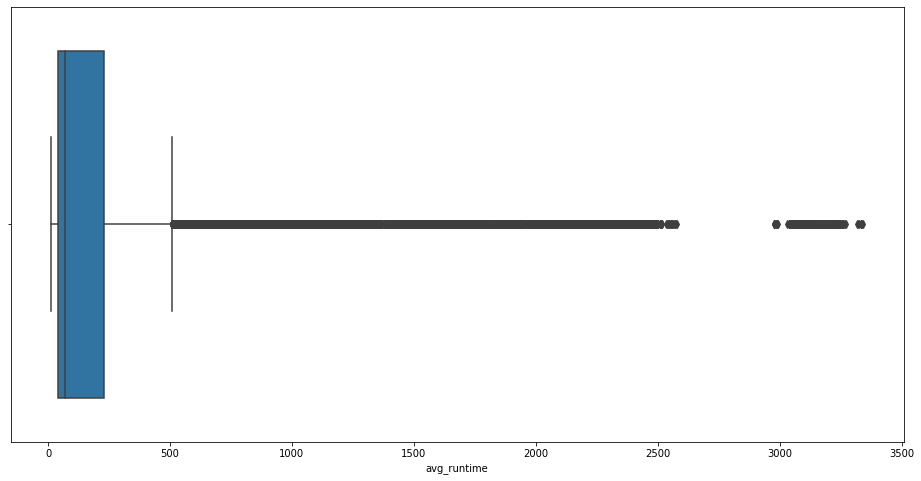

In [7]:
#finding outliers using boxplot
plt.figure(figsize=(16,8))
sns.boxplot(x='avg_runtime', data = datafile1 )

In [8]:
#outlier removal
def outlier_removal(dframe, column, outlier_cutoff, cutoff_std):
    print("shape of original dataset: ", dframe.shape)
    print("max value: ", dframe[column].max())
    cutoff = dframe[column].mean() + cutoff_std*dframe[column].std()
    print("Cut off: ", cutoff)
    df_out = dframe.loc[(dframe[column] < cutoff)]
    print("shape: ",df_out.shape)
    return df_out
x_avg_runtime = outlier_removal(datafile1, 'avg_runtime',0.998,3)
x_avg_runtime.sort_values('avg_runtime',ascending=False).head()

shape of original dataset:  (241600, 15)
max value:  3341.5074999999997
Cut off:  1323.822435448423
shape:  (236349, 15)


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,avg_runtime
123315,64,128,32,8,8,8,8,2,8,8,0,0,1,1,1323.6200
183530,128,64,32,8,8,16,16,8,1,4,1,0,1,0,1323.4450
184510,128,64,32,8,8,32,16,8,1,4,1,1,1,0,1322.8550
184506,128,64,32,8,8,32,16,8,1,4,1,0,1,0,1322.5425
123327,64,128,32,8,8,8,8,2,8,8,1,1,1,1,1322.4350


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EDA418CF88>,
      dtype=object)

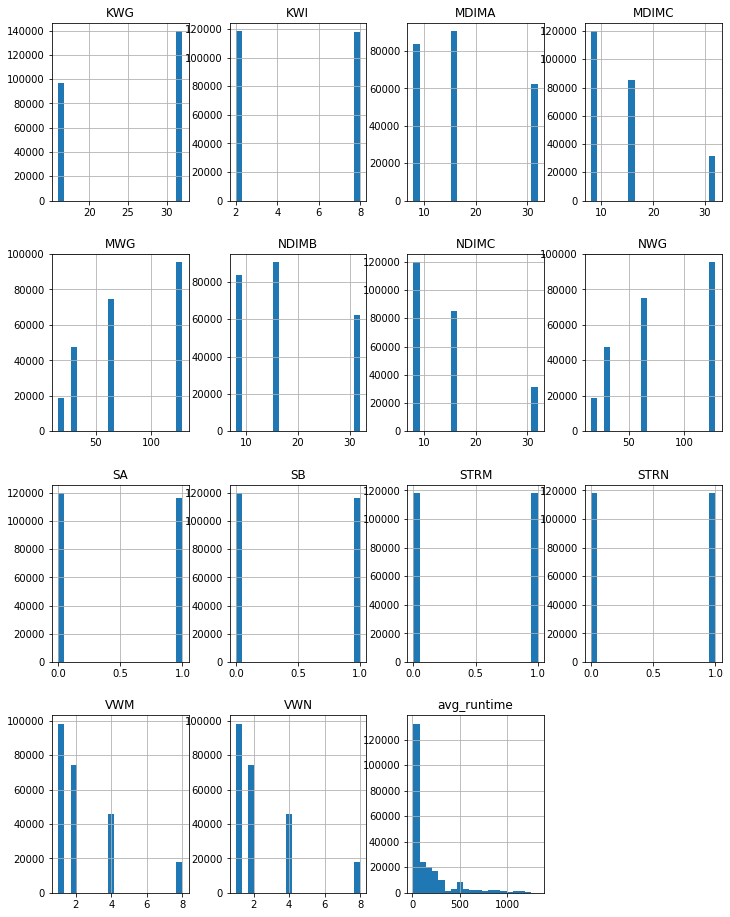

In [9]:
x_avg_runtime.hist(bins=20, figsize=(12,16))

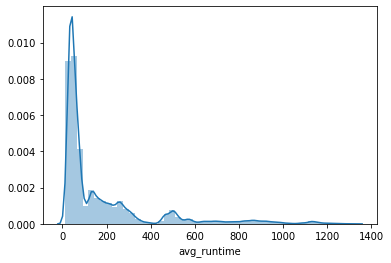

In [10]:
#plot of avg_runtime without normalization
sns.distplot(x_avg_runtime['avg_runtime']) 

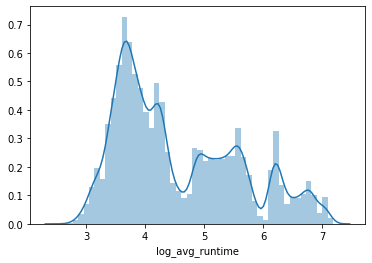

In [11]:
#plot of avg_runtime with normalization
x_avg_runtime['log_avg_runtime'] = np.log(x_avg_runtime['avg_runtime'])
sns.distplot(x_avg_runtime['log_avg_runtime'])

In [12]:
#finding correlation matrix of all attributes
x_avg_runtime.corr()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,avg_runtime,log_avg_runtime
MWG,1.000000,-0.016922,0.001912,0.123034,0.006513,0.162224,0.015498,-0.001036,0.354827,-0.008713,-0.000027,-0.000510,-0.011957,-0.010913,0.404833,0.447523
NWG,-0.016922,1.000000,0.001582,0.006818,0.123356,0.015642,0.161925,-0.000538,-0.009347,0.355637,0.000011,-0.000064,-0.012360,-0.011418,0.351260,0.322270
KWG,0.001912,0.001582,1.000000,0.158530,0.158530,-0.034927,-0.034916,-0.000496,-0.016589,-0.016612,-0.000033,-0.000386,-0.004368,-0.003606,-0.071257,-0.052841
MDIMC,0.123034,0.006818,0.158530,1.000000,-0.225031,0.200673,0.085993,0.000717,-0.129984,0.017604,0.000023,0.000347,0.011409,0.010708,-0.220871,-0.227605
NDIMC,0.006513,0.123356,0.158530,-0.225031,1.000000,0.085842,0.200838,0.000717,0.018218,-0.130405,0.000023,0.000347,0.011409,0.010708,-0.210248,-0.218130
MDIMA,0.162224,0.015642,-0.034927,0.200673,0.085842,1.000000,0.090139,-0.000022,-0.201665,-0.019542,-0.000017,-0.000085,0.000403,0.000414,-0.009409,-0.024501
NDIMB,0.015498,0.161925,-0.034916,0.085993,0.200838,0.090139,1.000000,0.000205,-0.019725,-0.201894,0.000022,-0.000067,0.000505,0.000184,-0.013820,-0.036777
KWI,-0.001036,-0.000538,-0.000496,0.000717,0.000717,-0.000022,0.000205,1.000000,-0.000183,-0.001057,-0.000038,0.000452,-0.000103,-0.000880,0.010946,-0.018768
VWM,0.354827,-0.009347,-0.016589,-0.129984,0.018218,-0.201665,-0.019725,-0.000183,1.000000,-0.001875,0.000079,0.000159,-0.006373,-0.005981,0.191496,0.204667
VWN,-0.008713,0.355637,-0.016612,0.017604,-0.130405,-0.019542,-0.201894,-0.001057,-0.001875,1.000000,-0.000024,0.000223,-0.006552,-0.005088,0.166608,0.135229


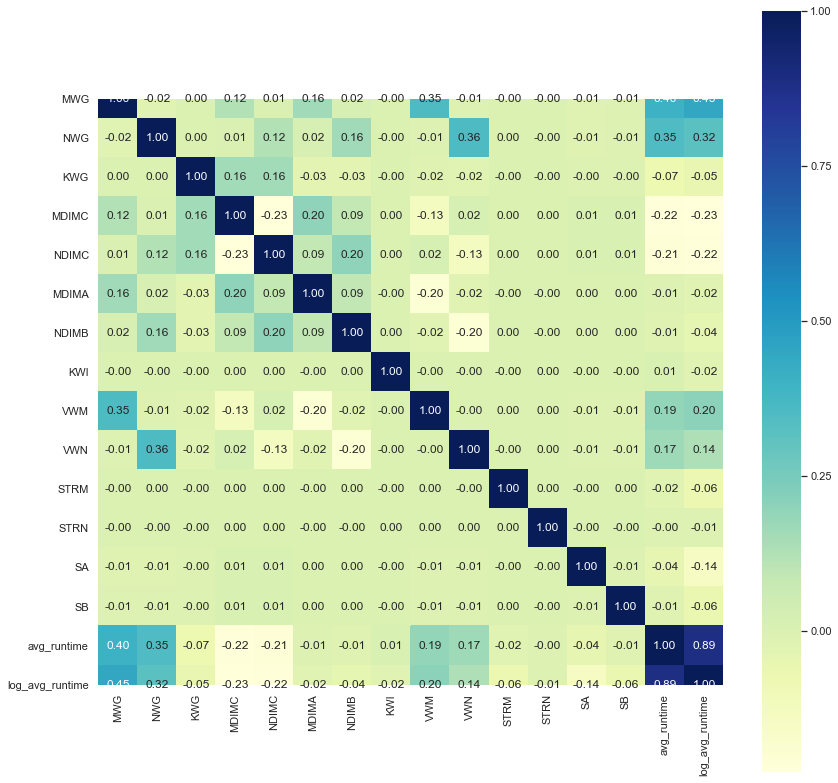

In [13]:
corr=x_avg_runtime.corr()
plt.figure(figsize = (14,14))
sns.set(font_scale=1)
sns.heatmap(corr, cbar=True, annot=True, square = True, cmap="YlGnBu",fmt = '.2f')
plt.show();

In [14]:
X1=x_avg_runtime[['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM','VWN', 'STRM', 'STRN', 'SA', 'SB']]
y=x_avg_runtime[['avg_runtime']]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X1 = scaler.fit_transform(X1)

In [19]:
X1 = pd.DataFrame(X1,columns=['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM','VWN', 'STRM', 'STRN', 'SA', 'SB'])

In [20]:
X1.insert(0,'Intercept',1)

In [21]:
X1.describe()

,Intercept,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
count,236349.0,2.363490e+05,2.363490e+05,2.363490e+05,2.363490e+05,2.363490e+05,2.363490e+05,2.363490e+05,2.363490e+05,2.363490e+05,2.363490e+05,2.363490e+05,2.363490e+05,2.363490e+05,2.363490e+05
mean,1.0,1.494076e-12,-2.697604e-13,-3.249865e-14,1.862651e-14,-5.689487e-14,1.285414e-13,1.022159e-13,-3.757629e-16,-1.678911e-13,-1.381187e-13,-1.485126e-17,5.947457e-16,2.113355e-14,-1.942657e-14
std,0.0,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,1.0,-1.498672e+00,-1.498506e+00,-1.198399e+00,-7.670811e-01,-7.670811e-01,-9.986597e-01,-9.985916e-01,-9.990654e-01,-7.380040e-01,-7.378138e-01,-9.999704e-01,-9.995474e-01,-9.852369e-01,-9.861379e-01
25%,1.0,-1.121477e+00,-1.121253e+00,-1.198399e+00,-7.670811e-01,-7.670811e-01,-9.986597e-01,-9.985916e-01,-9.990654e-01,-7.380040e-01,-7.378138e-01,-9.999704e-01,-9.995474e-01,-9.852369e-01,-9.861379e-01
50%,1.0,-3.670876e-01,-3.667481e-01,8.344465e-01,-7.670811e-01,-7.670811e-01,-1.464132e-01,-1.462463e-01,-9.990654e-01,-2.218759e-01,-2.223572e-01,-9.999704e-01,-9.995474e-01,-9.852369e-01,-9.861379e-01
75%,1.0,1.141691e+00,1.142262e+00,8.344465e-01,2.442700e-01,2.442700e-01,1.558080e+00,1.558444e+00,1.000935e+00,8.103802e-01,8.085561e-01,1.000030e+00,1.000453e+00,1.014984e+00,1.014057e+00
max,1.0,1.141691e+00,1.142262e+00,8.344465e-01,2.266972e+00,2.266972e+00,1.558080e+00,1.558444e+00,1.000935e+00,2.874892e+00,2.870382e+00,1.000030e+00,1.000453e+00,1.014984e+00,1.014057e+00


In [22]:
y.describe()

,avg_runtime
count,236349.000000
mean,175.549277
std,229.639526
min,13.317500
25%,40.342500
50%,67.952500
75%,213.060000
max,1323.620000


## Linear Regression

In [23]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=0)

In [24]:
x1_train = x1_train.as_matrix()
y1_train = y1_train.as_matrix()
x1_test  = x1_test.as_matrix()
y1_test = y1_test.as_matrix()

In [25]:
# cost fucntion
def lin_cost_function(datax, datay, coeffMatrix):
    dataLength = len(datax);
    costValue = np.sum(((datax.dot(coeffMatrix.T)) - datay) ** 2) / (2 * dataLength);
    return costValue;

In [26]:
# Gradient Descent Function for linear regression

def lin_gradient(datax, datay, alpha, iterations):
    coeffMatrix = np.zeros((1, len(datax[0])));
    length = len(datay);
    hist_cost = [0] * iterations;
    for i in range(iterations):
        costValue = lin_cost_function(datax, datay, coeffMatrix);
        hist_cost[i] = costValue; 
        difference = datax.dot(coeffMatrix.T) - datay;
        gradient_descent = datax.T.dot(difference) / length;
        coeffMatrix = coeffMatrix - (alpha * gradient_descent.T);    
#threshold = 0.0000001
        if (abs(hist_cost[i]- hist_cost[i-1])) <=0.000001:
                print("Convergence threshold level reached")
                print("Iterations needed to converge: ", i-1)
                print('Initial cost: ', hist_cost[0])
                print('Cost at convergance: ', hist_cost[i-1])
                break
    hist_cost = np.trim_zeros(hist_cost)
    print('Model Coefficients: ', coeffMatrix)
    plt.plot(hist_cost) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix

In [27]:
#predict
def predict_lin(x1_test, coeffMatrix):
    pred_target = x1_test.dot(coeffMatrix.T);
    return pred_target;

In [28]:
def lin_rmse(y1_test, pred_target):
    m_rmse = (sum((y1_test - pred_target) ** 2) / len(y1_test))
    m_rmse = ((m_rmse)**(1/2))
    return m_rmse;

Convergence threshold level reached
Iterations needed to converge:  17
Initial cost:  41763.719228579735
Cost at convergance:  13659.909072295313
Model Coefficients:  [[175.52556954 105.40527177  93.14884436  10.3936488  -85.703413
  -82.74516343   3.40136145   3.60320624   2.88489057  -1.080114
   -2.19729599  -4.98012366  -1.00463595  -4.83308358   0.56736245]]


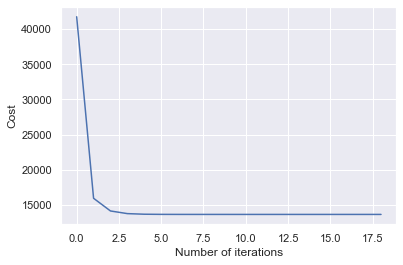

predicted dataset [[197.00719742 411.79464739 295.85432131 ...  62.57029519  -1.11955438
  287.72654378]]
RMSE for alpha= 1   is:  [165.53292156]


Convergence threshold level reached
Iterations needed to converge:  22
Initial cost:  41763.719228579735
Cost at convergance:  13659.909073251501
Model Coefficients:  [[175.52556938 105.40508244  93.14866374  10.39350489 -85.70316226
  -82.74491477   3.40135693   3.60319518   2.88488925  -1.07993831
   -2.19712853  -4.9801234   -1.00463571  -4.83310111   0.56734743]]


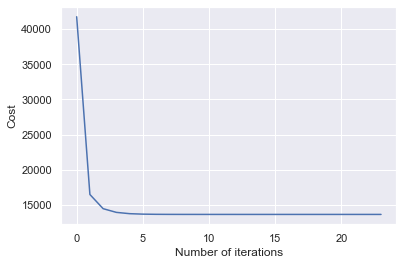

predicted dataset [[197.00698996 411.79400239 295.85425155 ...  62.57024245  -1.11925312
  287.72678   ]]
RMSE for alpha= 0.8   is:  [165.53292109]


Convergence threshold level reached
Iterations needed to converge:  32
Initial cost:  41763.719228579735
Cost at convergance:  13659.909072786944
Model Coefficients:  [[175.52556935 105.40504277  93.14862699  10.3934742  -85.70310941
  -82.74486264   3.40135541   3.60319148   2.88488897  -1.07990129
   -2.19709439  -4.98012335  -1.00463566  -4.83310481   0.56734426]]


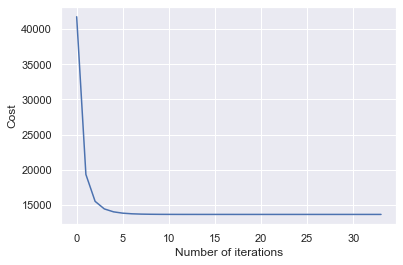

predicted dataset [[197.00694529 411.79386549 295.85423655 ...  62.57023174  -1.11919243
  287.72682825]]
RMSE for alpha= 0.6   is:  [165.53292099]


Convergence threshold level reached
Iterations needed to converge:  49
Initial cost:  41763.719228579735
Cost at convergance:  13659.909074333475
Model Coefficients:  [[175.52556902 105.40465513  93.14825996  10.39317714 -85.7025969
  -82.74435499   3.40134201   3.60316266   2.88488624  -1.07953945
   -2.19675245  -4.98012282  -1.00463521  -4.8331409    0.56731334]]


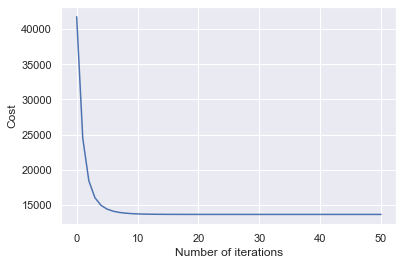

predicted dataset [[197.00651819 411.79254289 295.85409376 ...  62.57011977  -1.11858704
  287.72731735]]
RMSE for alpha= 0.4   is:  [165.53292005]


Convergence threshold level reached
Iterations needed to converge:  101
Initial cost:  41763.719228579735
Cost at convergance:  13659.90907625697
Model Coefficients:  [[175.52556858 105.40415235  93.14778595  10.39279086 -85.70193082
  -82.74369575   3.40132407   3.6031232    2.8848827   -1.07907018
   -2.19631112  -4.98012214  -1.00463462  -4.83318775   0.5672732 ]]


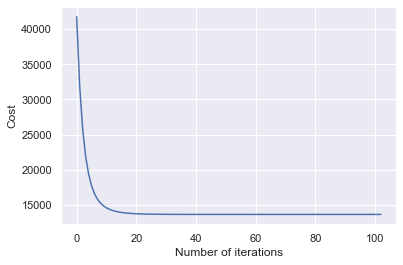

predicted dataset [[197.00596145 411.79082288 295.85390761 ...  62.56997625  -1.1178048
  287.72794697]]
RMSE for alpha= 0.2   is:  [165.53291881]


Convergence threshold level reached
Iterations needed to converge:  200
Initial cost:  41763.719228579735
Cost at convergance:  13659.909081252072
Model Coefficients:  [[175.52556784 105.40337787  93.14705617  10.39219558 -85.70090444
  -82.74268      3.40129626   3.60306195   2.88487723  -1.07834732
   -2.19563171  -4.98012108  -1.00463372  -4.83325992   0.56721136]]


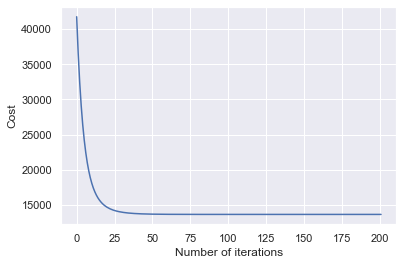

predicted dataset [[197.00510313 411.78817221 295.85362064 ...  62.56975538  -1.1166004
  287.72891577]]
RMSE for alpha= 0.1   is:  [165.53291691]


Convergence threshold level reached
Iterations needed to converge:  390
Initial cost:  41763.719228579735
Cost at convergance:  13659.9090919678
Model Coefficients:  [[175.52556669 105.40228968  93.14603181  10.39135865 -85.69946158
  -82.74125236   3.40125687   3.60297483   2.88486954  -1.0773317
   -2.19467821  -4.9801196   -1.00463246  -4.83336134   0.56712446]]


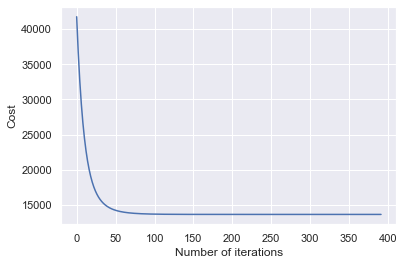

predicted dataset [[197.00389558 411.78444539 295.85321688 ...  62.56944578  -1.11490968
  287.73027445]]
RMSE for alpha= 0.05   is:  [165.53291424]


Convergence threshold level reached
Iterations needed to converge:  1807
Initial cost:  41763.719228579735
Cost at convergance:  13659.909172723548
Model Coefficients:  [[175.52556122 105.3981523   93.14214376  10.38817309 -85.69397094
  -82.73582133   3.40110496   3.60263653   2.88484023  -1.07347034
   -2.19106008  -4.98011395  -1.00462767  -4.83374707   0.56679395]]


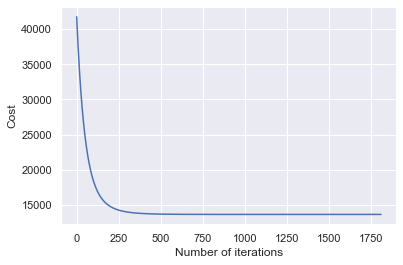

predicted dataset [[196.99929389 411.77025883 295.85167768 ...  62.56827305  -1.10849184
  287.73542326]]
RMSE for alpha= 0.01   is:  [165.53290428]


Convergence threshold level reached
Iterations needed to converge:  3478
Initial cost:  41763.719228579735
Cost at convergance:  13659.909273892406
Model Coefficients:  [[175.52555612 105.39509074  93.13927096  10.38581365 -85.68990491
  -82.73180054   3.40099115   3.6023817    2.88481849  -1.07061313
   -2.18838734  -4.98010975  -1.00462413  -4.83403258   0.56654932]]


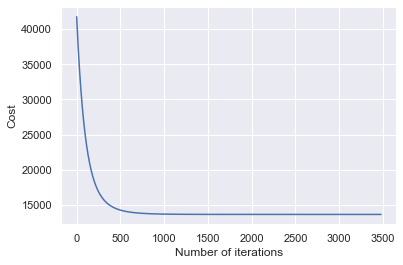

predicted dataset [[196.99588169 411.75975    295.85053578 ...  62.56740771  -1.10374973
  287.73922204]]
RMSE for alpha= 0.005   is:  [165.53289712]


Model Coefficients:  [[175.51727568 105.00378518  92.77529223  10.08311178 -85.16776788
  -82.21639608   3.3849714    3.56636834   2.88188934  -0.70567016
   -1.85032171  -4.97931452  -1.00415523  -4.87049158   0.535367  ]]


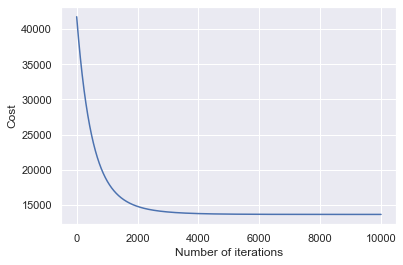

predicted dataset [[196.54855354 410.40147341 295.69512679 ...  62.45233906  -0.50897005
  288.20948602]]
RMSE for alpha= 0.001   is:  [165.53371819]


Model Coefficients:  [[174.34035422 100.59323982  88.7183677    6.8324396  -79.32326532
  -76.46669863   3.14192159   3.11157141   2.83207483   3.28971297
    1.8162438   -4.93651193  -0.99507715  -5.24767553   0.20217868]]


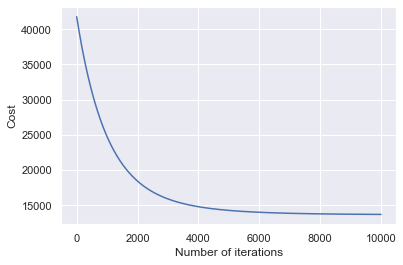

predicted dataset [[190.63981736 394.12085904 292.65204633 ...  60.34848092   5.14169411
  292.15992543]]
RMSE for alpha= 0.0005   is:  [165.7834287]




In [29]:
# linear regression function for Different Learning ratee
learning_rate = [1,0.8, 0.6, 0.4, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005]
#initiate arrays to save coeffs and predictions from each alpha run
coef_hist_lin = [0] * len(learning_rate)
pred_y_lin = [0] * len(learning_rate)
rmse_lin = [0] * len(learning_rate)
#calculate for each learning rate
for i, lr in enumerate(learning_rate, start=0):
    #get coefficients for variables
    coef_hist_lin[i] = lin_gradient(x1_train, y1_train, lr, 10000)
    # prediction with acquired coefficients
    pred_y_lin[i] = predict_lin(x1_test, coef_hist_lin[i])
    #get the predicted values
    print("predicted dataset", pred_y_lin[i].T)
    #get the RMSE of the model
    rmse_lin[i] = lin_rmse(y1_test, pred_y_lin[i])
    print("RMSE for alpha=", lr, "  is: ", rmse_lin[i])
    print ('\n')

### Logistic Regression

In [30]:
y1 = y

In [31]:
y1.median()

avg_runtime    67.9525
dtype: float64

In [32]:
y1.loc[y['avg_runtime'] <= 67.9525,'avg_runtime'] = 0
y1.loc[y['avg_runtime'] > 67.9525,'avg_runtime'] = 1

In [33]:
y1.describe()

,avg_runtime
count,236349.000000
mean,0.499998
std,0.500001
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [34]:
x1_train_log, x1_test_log, y1_train_log, y1_test_log = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [35]:
x1_train_log = x1_train_log.as_matrix()
x1_test_log = x1_test_log.as_matrix()
y1_train_log = y1_train_log.as_matrix()
y1_test_log = y1_test_log.as_matrix()

In [36]:
#Sigmoid funtion
def sigmoid_funct(x_df, theta):
    y_hat = np.dot(x_df, theta.T)
    y_hat = 1 / (1 + np.exp(-y_hat))
    return y_hat

In [37]:
#Cost Function
def cost_funtion_log(y_df_sigmoid, y_df, datalength):
    #cost0 = np.sum (np.log(1 - y_df_sigmoid.T).dot(1 - y_df))
    #cost1 = np.sum (np.log(y_df_sigmoid.T).dot(y_df))
    #cost = -(cost0+cost1) / dataLength
    cost = -(np.sum((y_df.T).dot(np.log(y_df_sigmoid))) + np.sum((1-(y_df.T)).dot(np.log(1 - y_df_sigmoid)))) / len(y_df)
    return cost

In [38]:
def logistic_gradientDescent(x_df, y_df, alpha, iterations):
    
    print("learning rate: ", alpha)
    print("Iteration limit: ", iterations)
    coeffMatrix = np.zeros((1, len(x_df[0])));
    #list for saving the cost from each iterations
    costHistory = [0] * iterations
    dataLength = len(x_df)
    
    #gradient descent
    for i in range(iterations):
        sigmoid_y = sigmoid_funct(x_df,coeffMatrix)
        loss =  sigmoid_y - y_df
        gradient = x_df.T.dot(loss) / dataLength
        coeffMatrix = coeffMatrix - (alpha * gradient.T)
        costValue = cost_funtion_log(sigmoid_y, y_df, dataLength)
        costHistory[i] = costValue 
        if (abs(costHistory[i]- costHistory[i-1])) <=0.00001:
                print("Convergence threshold level reached")
                print("Iterations needed to converge: ", i-1)
                print('Initial cost: ', costHistory[0])
                print('Cost at convergance: ', costHistory[i-1])
                break
        if i == (iterations-1):
            print("Iteration limit reached ",iterations)
            print('Initial cost: ', costHistory[0])
            print('Cost at convergance: ', costHistory[i-1])
    
    costHistory = np.trim_zeros(costHistory)
    print('Model Coefficients: ', coeffMatrix)
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix

In [39]:
#logistic function prediction
def log_predict(x1_test_log, coeffMatrix):
    target_pred = x1_test_log.dot(coeffMatrix.T);
    target_pred= np.where(target_pred >= 0.5 , 1, 0)
    return target_pred;

In [40]:
#how to print accuracy
def log_accuracy(y_actual, y_pred):
    df_1 = pd.DataFrame({'Actual': y_actual.flatten(), 'Predicted': y_pred.flatten()})
    acc= df_1.loc[df_1['Actual'] == df_1['Predicted']]
    count = len(y_actual)
    accurate_count = len(acc)    
    return accurate_count/count;

In [41]:
x1_test_log

array([[ 1.        ,  1.14169084, -1.49850556, ...,  1.00045282,
         1.01498433,  1.01405696],
       [ 1.        ,  1.14169084, -0.36674811, ..., -0.99954738,
        -0.98523689,  1.01405696],
       [ 1.        ,  1.14169084, -0.36674811, ...,  1.00045282,
        -0.98523689, -0.9861379 ],
       ...,
       [ 1.        , -0.36708765, -0.36674811, ..., -0.99954738,
         1.01498433,  1.01405696],
       [ 1.        , -0.36708765, -0.36674811, ...,  1.00045282,
        -0.98523689,  1.01405696],
       [ 1.        , -0.36708765,  1.14226183, ...,  1.00045282,
         1.01498433, -0.9861379 ]])

learning rate:  1
Iteration limit:  10000
Convergence threshold level reached
Iterations needed to converge:  54
Initial cost:  0.6931471805599325
Cost at convergance:  0.4970236368403731
Model Coefficients:  [[ 9.92687760e-04  1.22013516e+00  7.50325449e-01  1.31947400e-01
  -8.21902534e-01 -6.87393506e-01 -5.03947587e-02 -8.19611589e-02
  -1.40961528e-02 -5.91070951e-02 -1.41899163e-01 -3.11068974e-01
  -3.39066726e-02 -4.19230535e-01 -8.16029312e-02]]


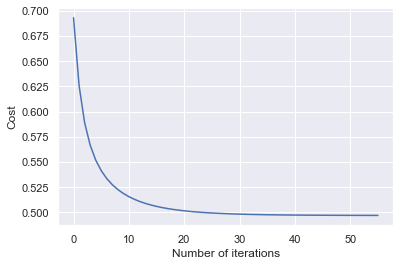

For alpha: 1 Iterations: 10000
Predicted y: [[0 1 1 ... 0 0 1]] accuracy: 0.7994076581341232


learning rate:  0.8
Iteration limit:  10000
Convergence threshold level reached
Iterations needed to converge:  65
Initial cost:  0.6931471805599325
Cost at convergance:  0.49705063251422615
Model Coefficients:  [[ 9.85278977e-04  1.21548055e+00  7.47012142e-01  1.30594442e-01
  -8.17768904e-01 -6.83767826e-01 -4.99618761e-02 -8.17461146e-02
  -1.40696638e-02 -5.69803728e-02 -1.40133013e-01 -3.10183513e-01
  -3.38053465e-02 -4.18126893e-01 -8.14565963e-02]]


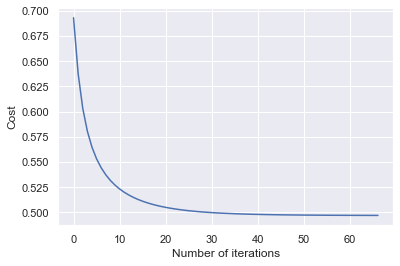

For alpha: 0.8 Iterations: 10000
Predicted y: [[0 1 1 ... 0 0 1]] accuracy: 0.7992384176010154


learning rate:  0.6
Iteration limit:  10000
Convergence threshold level reached
Iterations needed to converge:  83
Initial cost:  0.6931471805599325
Cost at convergance:  0.49708885510853085
Model Coefficients:  [[ 9.78880921e-04  1.20969473e+00  7.42888895e-01  1.28905589e-01
  -8.12623160e-01 -6.79252512e-01 -4.94267776e-02 -8.14803331e-02
  -1.40369158e-02 -5.43268884e-02 -1.37928517e-01 -3.09084386e-01
  -3.36795963e-02 -4.16758711e-01 -8.12760251e-02]]


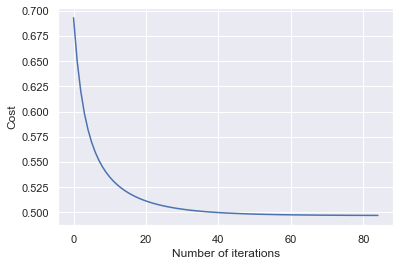

For alpha: 0.6 Iterations: 10000
Predicted y: [[0 1 1 ... 0 0 1]] accuracy: 0.799217262534377


learning rate:  0.4
Iteration limit:  10000
Convergence threshold level reached
Iterations needed to converge:  117
Initial cost:  0.6931471805599325
Cost at convergance:  0.49715808368259634
Model Coefficients:  [[ 9.74819156e-04  1.20094735e+00  7.36646538e-01  1.26339253e-01
  -8.04829373e-01 -6.72410407e-01 -4.86234849e-02 -8.10816535e-02
  -1.39877219e-02 -5.02949458e-02 -1.34578391e-01 -3.07424841e-01
  -3.34898034e-02 -4.14696473e-01 -8.10053865e-02]]


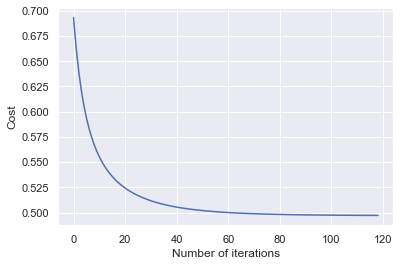

For alpha: 0.4 Iterations: 10000
Predicted y: [[0 1 1 ... 0 0 1]] accuracy: 0.7990480220012693


learning rate:  0.2
Iteration limit:  10000
Convergence threshold level reached
Iterations needed to converge:  204
Initial cost:  0.6931471805599325
Cost at convergance:  0.49738539602059095
Model Coefficients:  [[ 9.90690560e-04  1.18004180e+00  7.21692067e-01  1.20153011e-01
  -7.86142194e-01 -6.55993699e-01 -4.67310718e-02 -8.01437249e-02
  -1.38712731e-02 -4.05671124e-02 -1.26499242e-01 -3.03461735e-01
  -3.30370733e-02 -4.09787849e-01 -8.03671743e-02]]


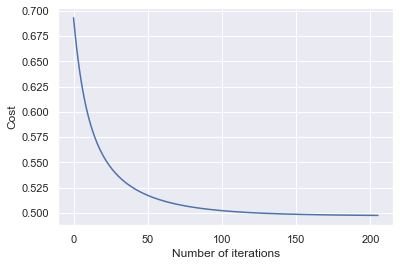

For alpha: 0.2 Iterations: 10000
Predicted y: [[0 1 1 ... 0 0 1]] accuracy: 0.7982652845356463


learning rate:  0.1
Iteration limit:  10000
Convergence threshold level reached
Iterations needed to converge:  350
Initial cost:  0.6931471805599325
Cost at convergance:  0.4978142906622232
Model Coefficients:  [[ 1.05979332e-03  1.15271016e+00  7.02077924e-01  1.11987106e-01
  -7.61603470e-01 -6.34423503e-01 -4.43244663e-02 -7.89466676e-02
  -1.37197052e-02 -2.76917889e-02 -1.15820604e-01 -2.98255928e-01
  -3.24440454e-02 -4.03369983e-01 -7.95396977e-02]]


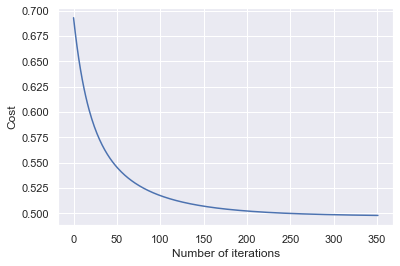

For alpha: 0.1 Iterations: 10000
Predicted y: [[0 1 1 ... 0 0 1]] accuracy: 0.7975671673365771


learning rate:  0.05
Iteration limit:  10000
Convergence threshold level reached
Iterations needed to converge:  585
Initial cost:  0.6931471805599325
Cost at convergance:  0.4986515705532289
Model Coefficients:  [[ 0.00122313  1.11541535  0.67523702  0.10079872 -0.72799611 -0.6048854
  -0.04118283 -0.07735714 -0.01350977 -0.00996073 -0.10115057 -0.29103569
  -0.03162591 -0.39450816 -0.07839556]]


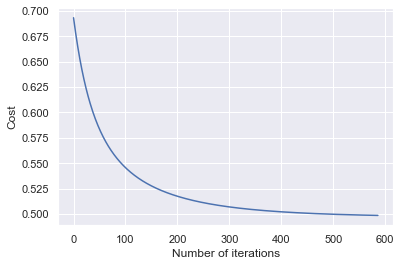

For alpha: 0.05 Iterations: 10000
Predicted y: [[0 1 1 ... 0 0 1]] accuracy: 0.7962767082716311


learning rate:  0.01
Iteration limit:  10000
Convergence threshold level reached
Iterations needed to converge:  1709
Initial cost:  0.6931471805599325
Cost at convergance:  0.5045900979772738
Model Coefficients:  [[ 0.00205162  0.9744107   0.57403724  0.0604013  -0.60191953 -0.49462245
  -0.03110822 -0.07148985 -0.01259474  0.05467762 -0.04773725 -0.26132506
  -0.02832458 -0.35800611 -0.07337508]]


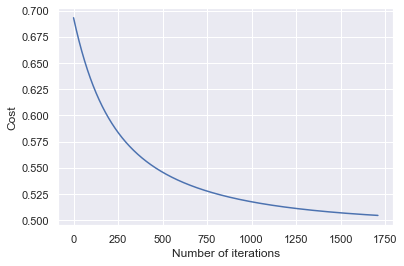

For alpha: 0.01 Iterations: 10000
Predicted y: [[0 1 1 ... 0 0 1]] accuracy: 0.7891262957478316


learning rate:  0.005
Iteration limit:  10000
Convergence threshold level reached
Iterations needed to converge:  2520
Initial cost:  0.6931471805599325
Cost at convergance:  0.5110255121146261
Model Coefficients:  [[ 0.0023443   0.8802122   0.50805069  0.03736163 -0.5213653  -0.42502736
  -0.02604839 -0.06732358 -0.01181573  0.0908328  -0.01711211 -0.23889626
  -0.02588815 -0.3299491  -0.0690477 ]]


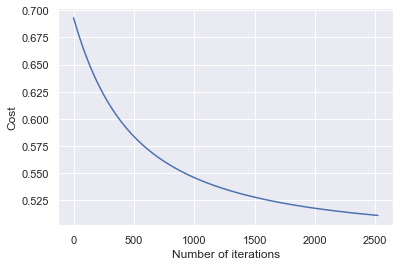

For alpha: 0.005 Iterations: 10000
Predicted y: [[0 1 1 ... 0 0 1]] accuracy: 0.7816162470911784


learning rate:  0.001
Iteration limit:  10000
Convergence threshold level reached
Iterations needed to converge:  4950
Initial cost:  0.6931471805599325
Cost at convergance:  0.5463520449469665
Model Coefficients:  [[ 0.00132055  0.56757684  0.30762869 -0.00755872 -0.29270469 -0.23289457
  -0.01594158 -0.04964651 -0.00829274  0.14130597  0.03948356 -0.15528655
  -0.01692948 -0.22025328 -0.04907701]]


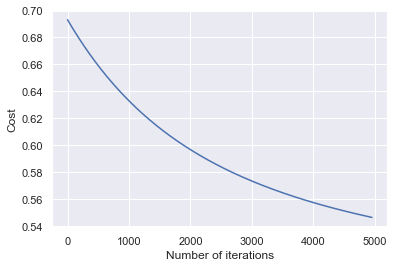

For alpha: 0.001 Iterations: 10000
Predicted y: [[0 1 1 ... 0 0 1]] accuracy: 0.7499471123334038


learning rate:  0.0005
Iteration limit:  10000
Convergence threshold level reached
Iterations needed to converge:  5733
Initial cost:  0.6931471805599325
Cost at convergance:  0.5759236857245995
Model Coefficients:  [[ 0.00061395  0.39942147  0.21112845 -0.01441667 -0.19343581 -0.15228792
  -0.01215309 -0.03727386 -0.00600042  0.12534312  0.04329863 -0.10869084
  -0.01191231 -0.15606039 -0.03578162]]


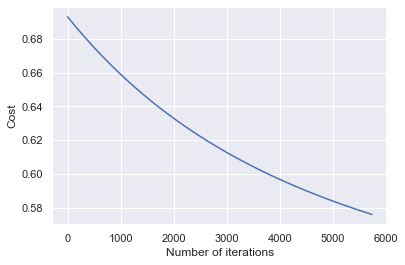

For alpha: 0.0005 Iterations: 10000
Predicted y: [[0 1 1 ... 0 0 0]] accuracy: 0.6948804738734927




In [42]:
# Run Logistic from here
alpha = [1,0.8, 0.6, 0.4, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005]
n_iters = 10000
beta_ls = [0] * len(alpha)
ypred_ls = [0] * len(alpha)
accuracy_ls = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls[i] = logistic_gradientDescent(x1_train_log, y1_train_log, a, n_iters)
    ypred_ls[i] = log_predict(x1_test_log,beta_ls[i])
    accuracy_ls[i] = log_accuracy(y1_test_log,ypred_ls[i])
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls[i].T,'accuracy:',accuracy_ls[i])
    print('\n')

## Experiments

##### Note down the values of rmse from below for varying values of learning rate

Convergence threshold level reached
Iterations needed to converge:  4867
Initial cost:  41763.719228579735
Cost at convergance:  13659.909360784854
Model Coefficients:  [[175.52555224 105.39305263  93.13735991  10.38424222 -85.68719709
  -82.72912321   3.40091491   3.60221058   2.884804    -1.0687111
   -2.18660958  -4.98010693  -1.00462178  -4.83422267   0.56638646]]


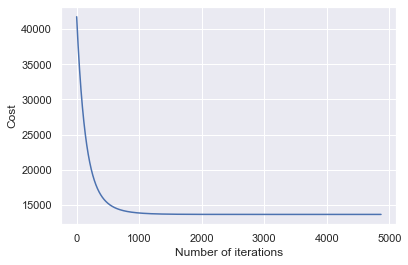

predicted dataset [[196.9936077  411.75275034 295.84977451 ...  62.56683231  -1.10059525
  287.74174709]]
RMSE for alpha= 0.0035   is:  [165.53289245]


Convergence threshold level reached
Iterations needed to converge:  5144
Initial cost:  41763.719228579735
Cost at convergance:  13659.909378477627
Model Coefficients:  [[175.52555149 105.39267757  93.13700834  10.38395299 -85.68669871
  -82.72863048   3.40090085   3.60217898   2.88480134  -1.06836109
   -2.18628255  -4.98010641  -1.00462135  -4.83425765   0.56635649]]


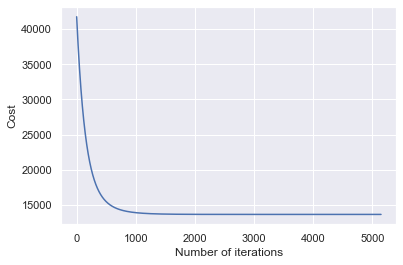

predicted dataset [[196.99318905 411.75146197 295.84963433 ...  62.56672646  -1.10001495
  287.74221146]]
RMSE for alpha= 0.0033   is:  [165.5328916]


Convergence threshold level reached
Iterations needed to converge:  5456
Initial cost:  41763.719228579735
Cost at convergance:  13659.909397991958
Model Coefficients:  [[175.52555066 105.39227626  93.13663219  10.3836435  -85.68616543
  -82.72810324   3.40088579   3.60214513   2.88479848  -1.06798658
   -2.18593265  -4.98010585  -1.00462089  -4.83429508   0.56632442]]


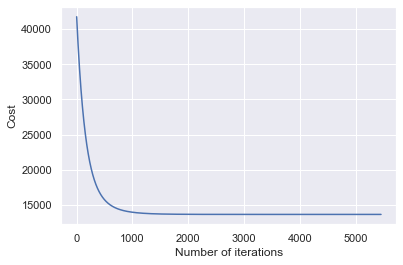

predicted dataset [[196.99274103 411.75008331 295.84948431 ...  62.56661322  -1.09939407
  287.74270825]]
RMSE for alpha= 0.0031   is:  [165.53289069]


Convergence threshold level reached
Iterations needed to converge:  5809
Initial cost:  41763.719228579735
Cost at convergance:  13659.90942077394
Model Coefficients:  [[175.52554971 105.39182282  93.13620721  10.38329378 -85.68556283
  -82.72750748   3.40086875   3.60210684   2.88479525  -1.06756341
   -2.18553735  -4.98010522  -1.00462036  -4.83433738   0.56628818]]


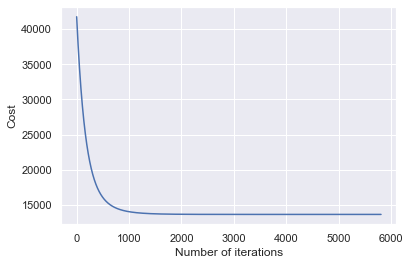

predicted dataset [[196.99223473 411.74852543 295.84931477 ...  62.56648528  -1.09869261
  287.74326946]]
RMSE for alpha= 0.0029   is:  [165.53288967]


Convergence threshold level reached
Iterations needed to converge:  6213
Initial cost:  41763.719228579735
Cost at convergance:  13659.90944643749
Model Coefficients:  [[175.52554865 105.39132945  93.13574486  10.38291324 -85.68490715
  -82.72685925   3.40085021   3.60206514   2.88479174  -1.06710299
   -2.18510729  -4.98010454  -1.00461979  -4.8343834    0.56624875]]


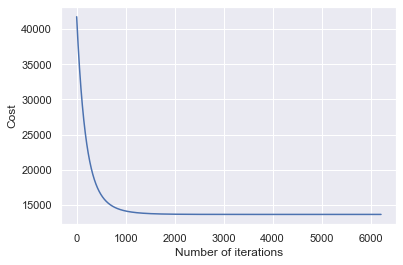

predicted dataset [[196.99168377 411.74683025 295.84913025 ...  62.56634609  -1.09792948
  287.74387996]]
RMSE for alpha= 0.0027   is:  [165.53288856]


Convergence threshold level reached
Iterations needed to converge:  6679
Initial cost:  41763.719228579735
Cost at convergance:  13659.90947661599
Model Coefficients:  [[175.52554743 105.39077058  93.13522119  10.38248215 -85.68416437
  -82.72612493   3.40082918   3.60201783   2.88478776  -1.06658144
   -2.18462019  -4.98010376  -1.00461915  -4.83443553   0.56620409]]


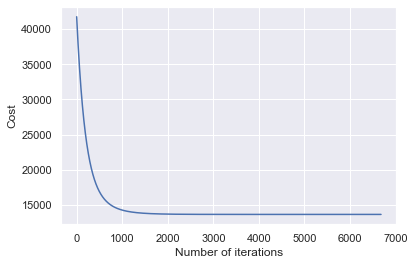

predicted dataset [[196.99105956 411.74490987 295.84892119 ...  62.56618844  -1.09706513
  287.74457133]]
RMSE for alpha= 0.0025   is:  [165.53288732]


Convergence threshold level reached
Iterations needed to converge:  7223
Initial cost:  41763.719228579735
Cost at convergance:  13659.90951225687
Model Coefficients:  [[175.525546   105.39013689  93.13462748  10.38199332 -85.6833221
  -82.72529227   3.4008053    3.60196412   2.88478325  -1.06599008
   -2.18406796  -4.98010288  -1.00461842  -4.83449464   0.56615345]]


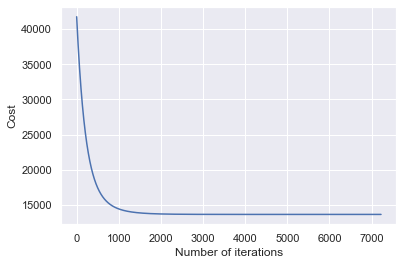

predicted dataset [[196.99035165 411.74273218 295.84868407 ...  62.56600971  -1.0960852
  287.74535506]]
RMSE for alpha= 0.0023   is:  [165.53288591]


Convergence threshold level reached
Iterations needed to converge:  7868
Initial cost:  41763.719228579735
Cost at convergance:  13659.909553641857
Model Coefficients:  [[175.52554438 105.38943251  93.13396762  10.3814499  -85.6823858
  -82.72436667   3.40077874   3.60190433   2.88477823  -1.06533274
   -2.18345421  -4.9801019   -1.00461761  -4.83456034   0.56609716]]


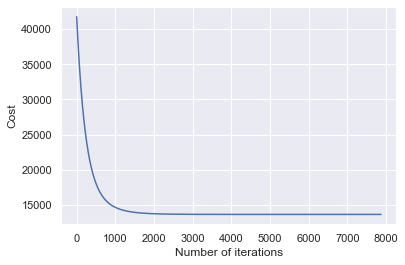

predicted dataset [[196.9895646  411.7403113  295.84842041 ...  62.56581106  -1.0949961
  287.74622598]]
RMSE for alpha= 0.0021   is:  [165.53288436]




KeyboardInterrupt: 

In [43]:
# linear regression function for Different Learning ratee
learning_rate = [0.0035,0.0033,0.0031,0.0029,0.0027,0.0025,0.0023,0.0021,0.0019]
#initiate arrays to save coeffs and predictions from each alpha run
coef_hist_lin = [0] * len(learning_rate)
pred_y_lin = [0] * len(learning_rate)
rmse_lin = [0] * len(learning_rate)
#calculate for each learning rate
for i, lr in enumerate(learning_rate, start=0):
    #get coefficients for variables
    coef_hist_lin[i] = lin_gradient(x1_train, y1_train, lr, 10000)
    # prediction with acquired coefficients
    pred_y_lin[i] = predict_lin(x1_test, coef_hist_lin[i])
    #get the predicted values
    print("predicted dataset", pred_y_lin[i].T)
    #get the RMSE of the model
    rmse_lin[i] = lin_rmse(y1_test, pred_y_lin[i])
    print("RMSE for alpha=", lr, "  is: ", rmse_lin[i])
    print ('\n')

In [44]:
learning_rate_1 = [0.0035,0.0033,0.0031,0.0029,0.0027,0.0025,0.0023,0.0021,0.0019]
rmse_1 = [165.53291231,165.53291217, 165.53291202, 165.53291186, 165.53291172, 165.53291155, 165.53291009, 165.53291095,165.53291098]

Text(0.5, 1.0, 'Learning rate VS RMSE')

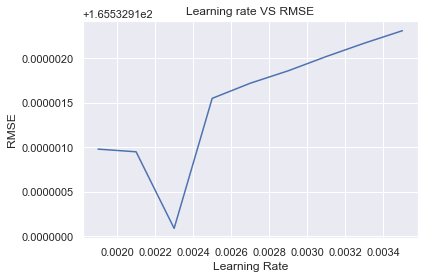

In [45]:
plt.plot(learning_rate_1,rmse_1)
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.title('Learning rate VS RMSE')

##### Note down the values of accuracy from below for varying values of learning rate

In [46]:
# Paste value from arushi and name them as in below cell
Learning_rate_1 = [7.9,7.91,7.92,7.93,7.95,7.96,7.98,7.99]
accuracy_1 = [0.799154,0.799149,0.799157,0.799182,0.799192,0.79917,0.799159,0.799147]

In [ ]:
alpha = [7.9,7.91,7.92,7.93,7.95,7.96,7.98,7.99]
n_iters = 10000
beta_ls = [0] * len(alpha)
ypred_ls = [0] * len(alpha)
accuracy_ls = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls[i] = logistic_gradientDescent(x1_train_log, y1_train_log, a, n_iters)
    ypred_ls[i] = log_predict(x1_test_log,beta_ls[i])
    accuracy_ls[i] = log_accuracy(y1_test_log,ypred_ls[i])
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls[i].T,'accuracy:',accuracy_ls[i])
    print('\n')

Text(0.5, 1.0, 'Learning rate VS Accuracy')

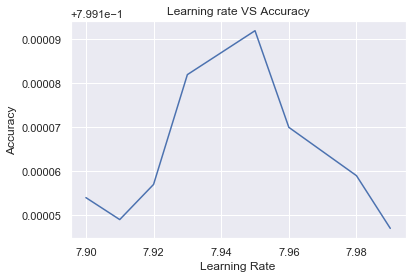

In [47]:
plt.plot(Learning_rate_1,accuracy_1)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Learning rate VS Accuracy')

### Experiment 2

In [ ]:
## Linear

In [ ]:
# linear regression function keeping alpha comstant and changiing threshold in main def Gradient descent
learning_rate = [0.0023]
#initiate arrays to save coeffs and predictions from each alpha run
coef_hist_lin = [0] * len(learning_rate)
pred_y_lin = [0] * len(learning_rate)
rmse_lin = [0] * len(learning_rate)
#calculate for each learning rate
for i, lr in enumerate(learning_rate, start=0):
    #get coefficients for variables
    coef_hist_lin[i] = lin_gradient(x1_train, y1_train, lr, 10000)
    # prediction with acquired coefficients
    pred_y_lin[i] = predict_lin(x1_test, coef_hist_lin[i])
    #get the predicted values
    print("predicted dataset", pred_y_lin[i].T)
    #get the RMSE of the model
    rmse_lin[i] = lin_rmse(y1_test, pred_y_lin[i])
    print("RMSE for alpha=", lr, "  is: ", rmse_lin[i])
    print ('\n')

In [48]:
threshold_linear = [0.0001,0.01,0.1]
rmse_linear =[165.5329118600,165.5329117200,165.5329115500]

Text(0.5, 1.0, 'RMSE Vs Threshold')

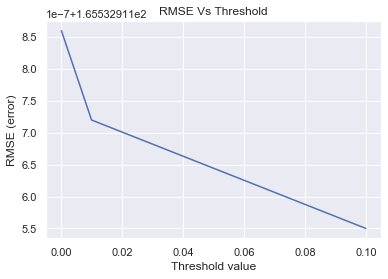

In [49]:
plt.plot(threshold_linear,rmse_linear)
plt.xlabel('Threshold value')
plt.ylabel('RMSE (error)')
plt.title('RMSE Vs Threshold')

In [ ]:
## Logistic

In [ ]:
alpha = [7.99]
n_iters = 10000
beta_ls = [0] * len(alpha)
ypred_ls = [0] * len(alpha)
accuracy_ls = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls[i] = logistic_gradientDescent(x1_train_log, y1_train_log, a, n_iters)
    ypred_ls[i] = log_predict(x1_test_log,beta_ls[i])
    accuracy_ls[i] = log_accuracy(y1_test_log,ypred_ls[i])
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls[i].T,'accuracy:',accuracy_ls[i])
    print('\n')

In [50]:
threshold_logistic = [0.0000001,0.001,0.01]
accuracy_logistic = [0.799192,0.798385,0.797930]

Text(0.5, 1.0, 'Accuracy Vs Threshold')

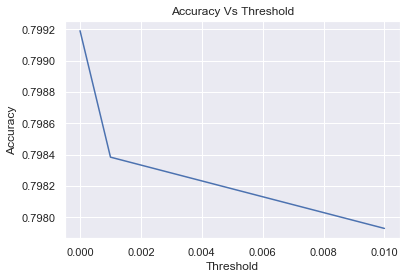

In [51]:
plt.plot(threshold_logistic,accuracy_logistic)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Vs Threshold')

### Experiment 3

In [52]:
X1.columns

Index(['Intercept', 'MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB',
       'KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB'],
      dtype='object')

In [53]:
X_lin1 = X1[['Intercept', 'MWG', 'KWG', 'MDIMC', 'MDIMA','KWI', 'VWN', 'STRM', 'SB']]

In [54]:
# Splitting data into train and test set in 70/30 ratio
X_train_r1, X_test_r1, y_train_r1, y_test_r1 = train_test_split(X_lin1, y, test_size=0.3, random_state=42)

In [55]:
X_train_r1 = X_train_r1.as_matrix()
X_test_r1 = X_test_r1.as_matrix()
y_train_r1 = y_train_r1.as_matrix()
y_test_r1 = y_test_r1.as_matrix()

Convergence threshold level reached
Iterations needed to converge:  1459
Initial cost:  0.24944392060153284
Cost at convergance:  0.09748707595907362
Model Coefficients:  [[ 0.48189552  0.20298648 -0.00084375 -0.10070345 -0.01807896 -0.00249545
   0.03617429 -0.04972162 -0.01516904]]


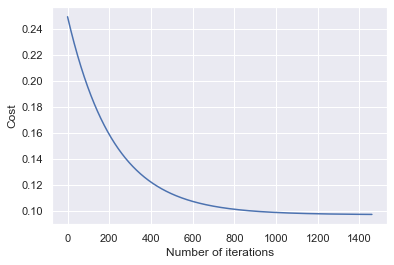

predicted dataset [[0.82114692 0.18793547 0.38434047 ... 0.34637157 0.22697811 0.40470197]]
RMSE for alpha= 0.0023   is:  [0.44179246]




In [56]:
# inserting random selected variables
# Once you run, it can be observed that RMSE is lower than the actual model
# linear regression function keeping alpha comstant and changiing threshold in main def Gradient descent
learning_rate = [0.0023]
#initiate arrays to save coeffs and predictions from each alpha run
coef_hist_lin = [0] * len(learning_rate)
pred_y_lin = [0] * len(learning_rate)
rmse_lin = [0] * len(learning_rate)
#calculate for each learning rate
for i, lr in enumerate(learning_rate, start=0):
    #get coefficients for variables
    coef_hist_lin[i] = lin_gradient(X_train_r1, y_train_r1, lr, 10000)
    # prediction with acquired coefficients
    pred_y_lin[i] = predict_lin(X_test_r1, coef_hist_lin[i])
    #get the predicted values
    print("predicted dataset", pred_y_lin[i].T)
    #get the RMSE of the model
    rmse_lin[i] = lin_rmse(y_test_r1, pred_y_lin[i])
    print("RMSE for alpha=", lr, "  is: ", rmse_lin[i])
    print ('\n')

In [57]:
#logistic Regression starts here

In [58]:
X_log1 = X1[['Intercept', 'MWG', 'KWG', 'MDIMC', 'MDIMA','KWI', 'VWN', 'STRM', 'SB']]

In [59]:
X_train_g1, X_test_g1, y_train_g1, y_test_g1 = train_test_split(X_log1, y1, test_size=0.3, random_state=42)

In [60]:
X_train_g1 = X_train_g1.as_matrix()
X_test_g1 = X_test_g1.as_matrix()
y_train_g1 = y_train_g1.as_matrix()
y_test_g1 = y_test_g1.as_matrix()

learning rate:  7.99
Iteration limit:  10000
Iteration limit reached  10000
Initial cost:  0.6931471805599349
Cost at convergance:  0.6251076834298139
Model Coefficients:  [[ 0.05065402  0.71039811 -0.09110981 -0.98103415 -0.42532587 -0.01955574
   0.26554375 -0.34979976 -0.10006091]]


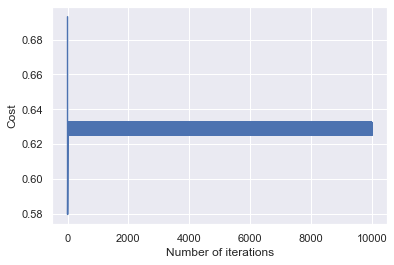

For alpha: 7.99 Iterations: 10000
Predicted y: [[1 0 1 ... 0 0 1]] accuracy: 0.6800084620266554




In [61]:
## It can be observed that accuracy decreases for logistic model
alpha = [7.99]
n_iters = 10000
beta_ls = [0] * len(alpha)
ypred_ls = [0] * len(alpha)
accuracy_ls = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls[i] = logistic_gradientDescent(X_train_g1, y_train_g1, a, n_iters)
    ypred_ls[i] = log_predict(X_test_g1,beta_ls[i])
    accuracy_ls[i] = log_accuracy(y_test_g1,ypred_ls[i])
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls[i].T,'accuracy:',accuracy_ls[i])
    print('\n') 


In [62]:
X1.columns

Index(['Intercept', 'MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB',
       'KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB'],
      dtype='object')

In [63]:
X_lin2 = X1[['Intercept', 'MWG', 'NWG', 'MDIMC', 'NDIMC', 'VWM', 'STRN', 'SA', 'SB']]

In [64]:
# Splitting data into train and test set in 70/30 ratio
X_train_r2, X_test_r2, y_train_r2, y_test_r2 = train_test_split(X_lin2, y, test_size=0.3, random_state=42)

In [65]:
X_train_r2 = X_train_r2.as_matrix()
X_test_r2 = X_test_r2.as_matrix()
y_train_r2 = y_train_r2.as_matrix()
y_test_r2 = y_test_r2.as_matrix()

Convergence threshold level reached
Iterations needed to converge:  1626
Initial cost:  0.24944392060153284
Cost at convergance:  0.08591874078026464
Model Coefficients:  [[ 0.48726668  0.20073235  0.11218132 -0.12216343 -0.10152035  0.00891771
  -0.00497544 -0.06870012 -0.01363174]]


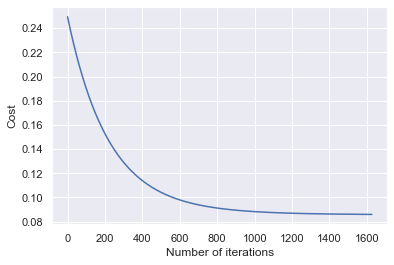

predicted dataset [[0.65485464 0.08302881 0.2215424  ... 0.32535959 0.40099936 0.2539122 ]]
RMSE for alpha= 0.0023   is:  [0.41586125]




In [66]:
learning_rate = [0.0023]
#initiate arrays to save coeffs and predictions from each alpha run
coef_hist_lin = [0] * len(learning_rate)
pred_y_lin = [0] * len(learning_rate)
rmse_lin = [0] * len(learning_rate)
#calculate for each learning rate
for i, lr in enumerate(learning_rate, start=0):
    #get coefficients for variables
    coef_hist_lin[i] = lin_gradient(X_train_r2, y_train_r2, lr, 10000)
    # prediction with acquired coefficients
    pred_y_lin[i] = predict_lin(X_test_r2, coef_hist_lin[i])
    #get the predicted values
    print("predicted dataset", pred_y_lin[i].T)
    #get the RMSE of the model
    rmse_lin[i] = lin_rmse(y_test_r2, pred_y_lin[i])
    print("RMSE for alpha=", lr, "  is: ", rmse_lin[i])
    print ('\n')

In [67]:
#logistic model starts here

X_log2 = X1[['Intercept', 'MWG', 'NWG', 'MDIMC', 'NDIMC', 'VWM', 'STRN', 'SA', 'SB']]

In [68]:
# Splitting data into train and test set in 70/30 ratio
X_train_g2, X_test_g2, y_train_g2, y_test_g2 = train_test_split(X_log2, y1, test_size=0.3, random_state=42)

In [69]:
X_train_g2 = X_train_g2.as_matrix()
X_test_g2 = X_test_g2.as_matrix()
y_train_g2 = y_train_g2.as_matrix()
y_test_g2 = y_test_g2.as_matrix()

learning rate:  7.99
Iteration limit:  10000
Convergence threshold level reached
Iterations needed to converge:  26
Initial cost:  0.6931471805599349
Cost at convergance:  0.507767084511991
Model Coefficients:  [[-0.0052507   1.19050765  0.69299556 -0.81262806 -0.66339744 -0.05521338
  -0.03302912 -0.41461245 -0.0809642 ]]


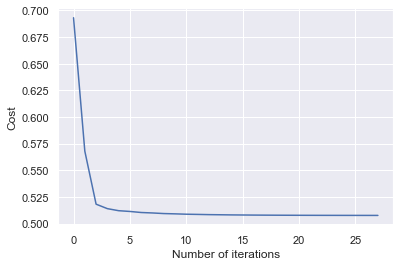

For alpha: 7.99 Iterations: 10000
Predicted y: [[1 0 0 ... 0 0 0]] accuracy: 0.7998448628446513




In [70]:
alpha = [7.99]
n_iters = 10000
beta_ls = [0] * len(alpha)
ypred_ls = [0] * len(alpha)
accuracy_ls = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls[i] = logistic_gradientDescent(X_train_g2, y_train_g2, a, n_iters)
    ypred_ls[i] = log_predict(X_test_g2,beta_ls[i])
    accuracy_ls[i] = log_accuracy(y_test_g2,ypred_ls[i])
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls[i].T,'accuracy:',accuracy_ls[i])
    print('\n') 